# Random Variables - Problem 1
A marksman takes 10 shots at a target and has probability 0.2 of hitting the target with each shot, independently of all other shots. Let X be the number of hits.

a. Calculate and sketch the PMF of X.

b. What is the probability of scoring no hits?

c. What is the probability of scoring more hits than misses?

d. Find the expectation and the variance of X.

e. Suppose the marksman has to pay $3 to enter the shooting range and he gets $2 dollars for each hit. Let Y be his profit. Find the expectation and the variance of Y .

f. Now let’s assume that the marksman enters the shooting range for free and gets the number of dollars that is equal to the square of the number of hits. Let Z be his profit. Find the expectation of Z.

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

a. Calculate and sketch the PMF of X.

To find probability of random variable $X$ for all the outcomes of sample space $\Omega$ in the probabilistic model.

$ p_{X}(x) = P(X=x) = P(\{ w\in\Omega \space | \space X(w)=x\})$

$p = 0.2$ and $X$ is the number of hits. For example one of the possible outcomes could be:

$ P(MMMHMHMMMH) = p^3(1-p)^7$

But to find the number of ways we can carry out the above outcome we need to use counting. Since this is a uniform sample space, we can say:

$ p_{X}(x) = \binom{n}{x}p^x(1-p)^{(n-x)}$

   x  n-x        pX
0  0   10  0.107374
1  1    9  0.268435
2  2    8  0.301990
3  3    7  0.201327
4  4    6  0.088080
5  5    5  0.026424
6  6    4  0.005505
7  7    3  0.000786
8  8    2  0.000074
9  9    1  0.000004


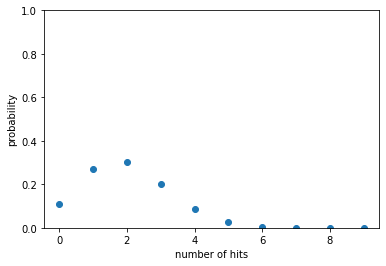

In [2]:
n = 10  # Number of trials
p = 0.2  # Probability of hitting the target

pmf_list = []
# Calculate the PMF for all possible values of random variable X, when takes on
# numbers from 0 to 10
for x in range(n):
    pX = math.comb(n, x) * (p**x) * ((1 - p) ** (n - x))
    pmf_list.append([x, n - x, pX])

data = pd.DataFrame(pmf_list, columns=["x", "n-x", "pX"])
print(data)

plt.plot(data.x, data.pX, "o")
plt.xlabel("number of hits")
plt.ylabel("probability")
plt.ylim(0, 1)
plt.show()


b. What is the probability of scoring no hits?

From above calculation, we can see:

$p_{X}(0) = 0.107 = 10.7\%$

c. What is the probability of scoring more hits than misses?

We can simply add all the $p_{X}$ which $X$ takes on any value above 5.

$ 5< X \leq 10$

$ P(\text{More hits than misses}) = \sum_{n=6}^{10}p_{X}(x)$

In [3]:
pmf_more_than_5 = data[data.x > 5]
total_prob_more_hits_than_misses = pmf_more_than_5.sum().loc["pX"]
print(total_prob_more_hits_than_misses)

0.006369280000000004


d. Find the expectation and the variance of X.

Expectation of X is $E[X] = \sum_{x}xp_{X}(x)$

Variance of X is $Var(X) = E[(X-E[X])^2] = \sum_{x}(x-E[X])^2p_{X}(x)$

Standard Deviation of X is $ \sigma = \sqrt {Var(X)}$


In [4]:
e_X = np.sum(data.x * data.pX)
var_x = np.sum(((data.x - e_X) ** 2) * data.pX)
std_deviation = np.sqrt(var_x)

print(f"Expectation of X = {e_X}")
print(f"Variance of X = {var_x}")
print(f"Standard Deviation of X = {std_deviation}")


Expectation of X = 1.999998976000001
Variance of X = 1.5999934463993715
Standard Deviation of X = 1.2649084735265914


We can confirm the above value intuitively. The probability of hitting the target is 0.2, so in 10 trials the expectation of hitting the target should be a number close to 2.

Also the following shows the standard deviation and how the majority of values for X are distributed.

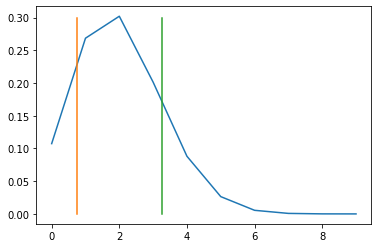

In [5]:
plt.plot(data.x, data.pX)

lower_bound_of_std_deviation = e_X - std_deviation
# Lower side of Std Deviation
x1 = [lower_bound_of_std_deviation, lower_bound_of_std_deviation]

upper_bound_of_std_deviation = e_X + std_deviation
x2 = [upper_bound_of_std_deviation, upper_bound_of_std_deviation]

y = [0, 0.3]

plt.plot(x1, y)
plt.plot(x2, y)
plt.show()


e. Suppose the marksman has to pay $3 to enter the shooting range and he gets $2 dollars for each hit. Let Y be his profit. Find the expectation and the variance of Y.

$Y$ is a function of random variable $X$, so $Y=g(x)$ is also a random variable.

$Y=2X+3$

$Y=g(x)=2x+3$

$E[Y]=E[g(x)]=\sum_{x}g(x)p_{X}(x)$


In [6]:
# g(x)=2x-3
data["gx"] = data.x * 2 - 3

e_Y = np.sum(data.gx * data.pX)
var_Y = np.sum(((data.gx - e_Y) ** 2) * data.pX)
std_deviation_Y = np.sqrt(var_Y)

print(f"Expectation of Y = {e_Y}")
print(f"Variance of Y = {var_Y}")
print(f"Standard Deviation of Y = {std_deviation_Y}")


Expectation of Y = 0.9999982592000006
Variance of Y = 6.399973785597329
Standard Deviation of Y = 2.5298169470531517


We could also calculate $E[Y]$ in a simpler way. Since $Y$ is a linear function of $X$, we can say:

$E[g(x)]=g(E[X])$

So,

$E[Y]=E[2X+3]=2E[X]-3$

f. Now let’s assume that the marksman enters the shooting range for free and gets the number of dollars that is equal to the square of the number of hits. Let Z be his profit. Find the expectation of Z.


$Z=X^2$ and so, $h(x)=x^2$

However, since Z is not a linear function, so:

$E[g(x)]\ne g(E[X])$

$E[Z]=E[X^2]=\sum_{x}h(x) p_{X}(x)=\sum_{x}x^2 p_{X}(x)$

In [7]:
data["hx"] = data.x**2
e_Z = np.sum(data.hx * data.pX)

print(f"Expectation of Z = {e_Z}")


Expectation of Z = 5.599989760000003
